In [1]:
pkg load image

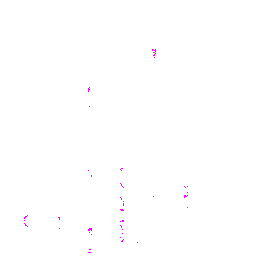

In [37]:
I = imread("girl.tiff");
di = double(I);
imshow(uint8(di));
% imshow(di);

In [3]:
cmap = rgb2hsv(I);

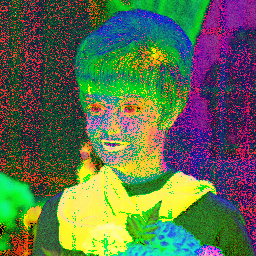

In [5]:
imshow(cmap);

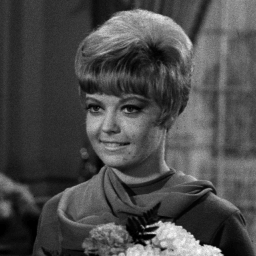

In [16]:
imgr = I(:,:,1);
imshow(imgr);

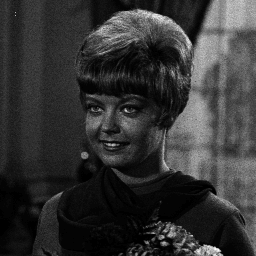

In [17]:
imgb = I(:,:,3);
imshow(imgb);

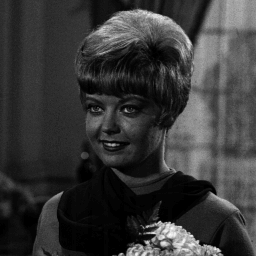

In [18]:
imgg = I(:,:,2);
imshow(imgg);

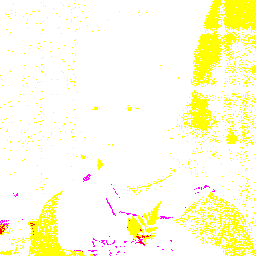

In [22]:
Y = 0.299*imgr + 0.587*imgg + 0.114*imgb;
U = -0.147*imgr - 0.289*imgg + 0.436*imgb;
V = 0.615*imgr - 0.515*imgg - 0.100*imgb;
YUV = cat(3, Y, U, V);
figure; imshow(YUV);

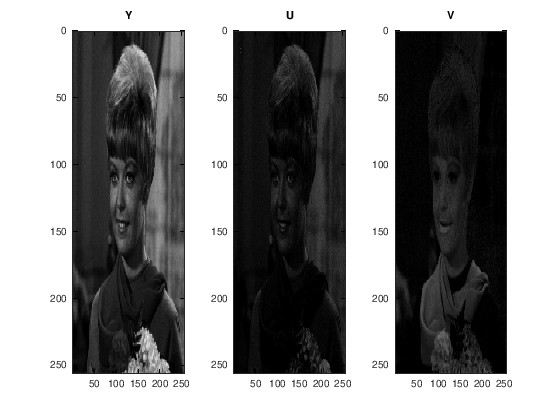

In [43]:
imshow(Y), imshow(U), imshow(V);
subplot(1, 3, 1), subimage(Y), title("Y");
subplot(1, 3, 2), subimage(U), title("U");
subplot(1, 3, 3), subimage(V), title("V");

常用的图像灰度计算公式：gray = red * 0.299 + green * 0.587 + blue * 0.114

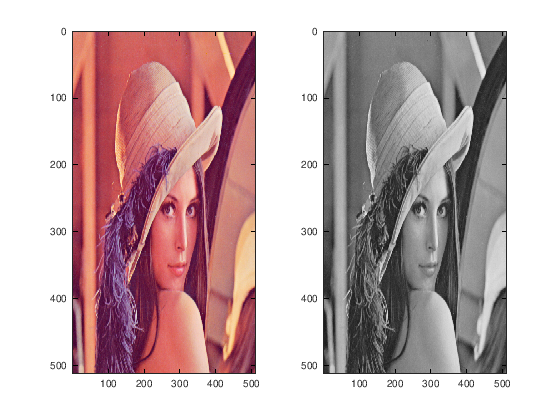

In [30]:
I = imread("lena.tiff");
gray = rgb2gray(I);
subplot(1, 2, 1), subimage(I);
subplot(1, 2, 2), subimage(gray);

In [ ]:
R = I(:,:,1), G = I(:,:,2), B = I(:,:,3);
Gray = R.*0.299 + G.*0.587 + B.*0.114;
imshow(Gray);

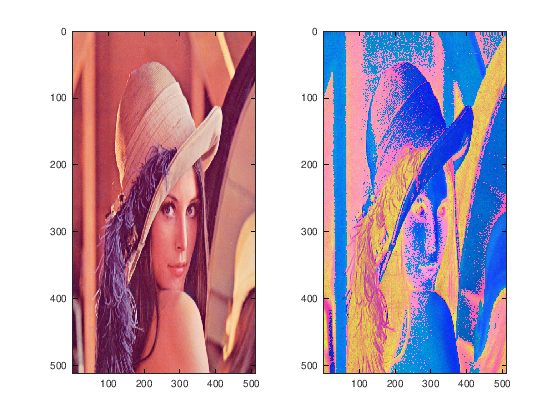

In [41]:
% rgb -> hsv
I = imread("lena.tiff");
I2hsv = rgb2hsv(I);
subplot(1, 2, 1), subimage(I);
subplot(1, 2, 2), subimage(I2hsv);

In [ ]:
function [h,s,v] = rgb2hsv(r,g,b)
switch nargin
  case 1,
     if isa(r, 'uint8'), 
        r = double(r) / 255; 
     elseif isa(r, 'uint16')
        r = double(r) / 65535;
     end
  case 3,
     if isa(r, 'uint8'), 
        r = double(r) / 255; 
     elseif isa(r, 'uint16')
        r = double(r) / 65535;
     end
     
     if isa(g, 'uint8'), 
        g = double(g) / 255; 
     elseif isa(g, 'uint16')
        g = double(g) / 65535;
     end
     
     if isa(b, 'uint8'), 
        b = double(b) / 255; 
     elseif isa(b, 'uint16')
        b = double(b) / 65535;
     end
     
  otherwise,
      error(message('MATLAB:rgb2hsv:WrongInputNum'));
end
  
threeD = (ndims(r)==3); % Determine if input includes a 3-D array
 
if threeD,
  g = r(:,:,2); b = r(:,:,3); r = r(:,:,1);
  siz = size(r);
  r = r(:); g = g(:); b = b(:);
elseif nargin==1,
  g = r(:,2); b = r(:,3); r = r(:,1);
  siz = size(r);
else
  if ~isequal(size(r),size(g),size(b)), 
    error(message('MATLAB:rgb2hsv:InputSizeMismatch'));
  end
  siz = size(r);
  r = r(:); g = g(:); b = b(:);
end
 
v = max(max(r,g),b);
h = zeros(size(v));
s = (v - min(min(r,g),b));
 
z = ~s;
s = s + z;
k = find(r == v);
h(k) = (g(k) - b(k))./s(k);
k = find(g == v);
h(k) = 2 + (b(k) - r(k))./s(k);
k = find(b == v);
h(k) = 4 + (r(k) - g(k))./s(k);
h = h/6;
k = find(h < 0);
h(k) = h(k) + 1;
h=(~z).*h;
 
k = find(v);
s(k) = (~z(k)).*s(k)./v(k);
s(~v) = 0;
 
if nargout<=1,
  if (threeD || nargin==3),
    h = reshape(h,siz);
    s = reshape(s,siz);
    v = reshape(v,siz);
    h=cat(3,h,s,v);
  else
    h=[h s v];
  end
else
  h = reshape(h,siz);
  s = reshape(s,siz);
  v = reshape(v,siz);
end

In [ ]:
% rgb to hsi
I = imread("lena.tiff");
r = I(:,:,1); g = I(:,:,2); b = I(:,:,3);
num = 0.5*((r-g)+(r-b));
den = sqrt((r-g).^2 + (r-b).*(g-b)),
theta = acos(num./(den));
H = theta;
H(b>g) = 2*pi-H(b>g);
H = H/(2*pi);

num = min(r, g, b);
den = r + g + b;
S = 1 - 3.*num./den;
I = (r+g+b)/3;
hsi = cat(3, H, S, I);
% imshow(hsi);
subplot(1, 1, 1), subimage(hsi)